# NBA - Hall Of Fame prediction
### <U> Basic information about NBA and Hall Of Fame
**NBA** The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world.

**Hall Of Fame** The Naismith Memorial Basketball Hall of Fame is located in the home of basketball in Springfield, Massachusetts. It is named after the man who invented basketball – James Naismith. The Hall of Fame was created in 1959, and opened to the public only in 1968. This includes coaches, players, and figures who have contributed to the development of basketball. The Basketball Hall of Fame is designed to immortalize the brightest basketball stars and the best moments of the game. It remains the world’s best sports museum.

**Selection process** The Hall of Fame is eligible to select individuals from around the world whose contribution to basketball has been significant, the criteria for selecting basketball players must be 4 years after full retirement from professional basketball, coaches or referees must be 4 years after retirement or have at least 25 years seniority in high school, college or professional basketball. In addition, other personalities such as reporters, sports commentators, and prominent broadcasters are eligible to be elected, for whom there is no defined quantitative criterion.

*** At the project, We only deal with male players** 

The selection is made by subcommittees:

consisting of nine experts can recommend up to 10 candidates each year if they have at least seven supports

Following the recommendations of the subcommittees, the candidates are examined in 4 "honorary committees", each honorary committee is composed of 24 professionals, including members of the Hall of Fame, media people, basketball practitioners, and other donors. All honorary committees have 12 common permanent members and the rest are rotated according to the committee's expertise. In order to be elected to the Hall of Fame, the support of at least 18 members of the Honor Committee is required.
 
(source : https://en.wikipedia.org/wiki/Naismith_Memorial_Basketball_Hall_of_Fame)
    
### <u>Experts
    
We take advice and recommends by experts of NBA
* **Sharon Davidovitch** Owner of "עושים NBA" podcast.
* **Eran Soroka** NBA reporter at the Israeli sport channel "Sport 5" and owner of "עושים NBA" podcast.
* **Roi Weinberg** NBA reporter at the Israeli sport channel "Sport 5".

We will mention them in the relevant parts.

### <u> Data source 

The data was collected by web-scraping from the website: https://en.hispanosnba.com/
    
### <u> Task definition

Our task is to classify the players for those who have been chosen for the Hall of Fame and those who have not by parameters
of career stats and awards that each player achieved in his career.
   

    
    

In [1038]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## <u>Part 1: Data cleaning and preparing for work 

##### Loading the dataset

In [1039]:
hof = pd.read_csv('C:\\Users\\Shlomit\\Desktop\\NBA-Hall-Of-Fame-Project\\hall-of-fame-DF.csv')
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,S.T,T.T,F.T.D,S.T.D,Seasons,Playoffs,Finals,titles,Retired,H.O.F
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,1.0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,--,72.8,8.0,1.2,0.6,...,NaN,NaN,NaN,NaN,10.0,3.0,0.0,0.0,1.0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,Ante Zizic,113,27,13.4,58.1,0.0,71.1,3.9,0.6,0.2,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,0.0,0.0,0.0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4702,Bill Zopf,53,0,7.5,36.3,--,55.6,0.9,1.4,--,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4703,Ivica Zubac,336,203,18.6,59.7,10.0,75.6,6.3,1.1,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,0.0,0.0,0.0,0.0


##### Change columns names

In [1040]:
hof.columns

Index(['PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL',
       'TO', 'BLK', 'PF', 'PTS', 'EFF', 'A.S.G', 'P.O.M', 'F.T', 'S.T', 'T.T',
       'F.T.D', 'S.T.D', 'Seasons', 'Playoffs', 'Finals', 'titles', 'Retired',
       'H.O.F'],
      dtype='object')

In [1041]:
hof=hof.rename({'A.S.G':'ASG','P.O.M':'POM','F.T':'T1','S.T':'T2','T.T':'T3','F.T.D':'DT1',
'S.T.D':'DT2','titles':'Titles', 'H.O.F':'HOF'},axis=1)
hof.columns

Index(['PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL',
       'TO', 'BLK', 'PF', 'PTS', 'EFF', 'ASG', 'POM', 'T1', 'T2', 'T3', 'DT1',
       'DT2', 'Seasons', 'Playoffs', 'Finals', 'Titles', 'Retired', 'HOF'],
      dtype='object')

### <u> Columns explanation:
* **PLAYER_NAME**: Player name                                           
* **GP:** Games played                                                    
* **GS:** Games start                                               
* **MIN:** Minutes per game                                             
* **FG:** field goals percentage                                         
* **3P:** 3P percentage
* **FT:** Free throw percentage
* **REB:** Rebound per game
* **STL:** Steals per game
* **TO:** Turnovers per game
* **BLK:** Blocks per game
* **PF:** Personal fouls per game
* **PTS:** Points per game
* **EFF:** Efficiency
* **ASG:** All star games
* **POM:** Player of the month
* **T1:**  All-NBA first Team
* **T2:**  All-NBA second Team
* **T3:**  All-NBA third Team
* **DT1:** All-NBA-Defensive first Team
* **DT2:** All-NBA-Defensive second Team
* **Seasons:** Seasons played
* **Playoffs:** Reached the playoffs
* **Finals:** Reached the finals
* **Titles:** Won championships
* **Retired:** If Retired value is: 1, else value is: 0
* **HOF:** If selected to Hall Of Fame value is: 1, else value is: 0

##### Convert columns types to float from object

In [1042]:
hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  4705 non-null   object 
 1   GP           4705 non-null   int64  
 2   GS           4705 non-null   int64  
 3   MIN          4705 non-null   object 
 4   FG           4705 non-null   float64
 5   3P           4705 non-null   object 
 6   FT           4705 non-null   float64
 7   REB          4705 non-null   object 
 8   AST          4705 non-null   float64
 9   STL          4705 non-null   object 
 10  TO           4705 non-null   object 
 11  BLK          4705 non-null   object 
 12  PF           4705 non-null   float64
 13  PTS          4705 non-null   float64
 14  EFF          4705 non-null   float64
 15  ASG          445 non-null    float64
 16  POM          114 non-null    float64
 17  T1           250 non-null    float64
 18  T2           250 non-null    float64
 19  T3    

In [1043]:
for i in range(0 , len(hof['3P'])):
    try:
        hof.loc[i,'3P'] = float(hof.loc[i,'3P'])
    except:
        hof.loc[i,'3P'] = None

for i in range(0 , len(hof['MIN'])):
    try:
        hof.loc[i,'MIN'] = float(hof.loc[i,'MIN'])
    except:
        hof.loc[i,'MIN'] = None
        
for i in range(0 , len(hof['STL'])):
    try:
        hof.loc[i,'STL'] = float(hof.loc[i,'STL'])
    except:
        hof.loc[i,'STL'] = None
        
for i in range(0 , len(hof['TO'])):
    try:
        hof.loc[i,'TO'] = float(hof.loc[i,'TO'])
    except:
        hof.loc[i,'TO'] = None
        
for i in range(0 , len(hof['BLK'])):
    try:
        hof.loc[i,'BLK'] = float(hof.loc[i,'BLK'])
    except:
        hof.loc[i,'BLK'] = None

for i in range(0 , len(hof['REB'])):
    try:
        hof.loc[i,'REB'] = float(hof.loc[i,'REB'])
    except:
        hof.loc[i,'REB'] = None

In [1044]:
hof.REB=hof.REB.astype("float")  
hof.MIN=hof.MIN.astype("float")       
hof['3P']=hof['3P'].astype("float")       
hof.STL=hof.STL.astype("float")       
hof.TO=hof.TO.astype("float")  
hof.BLK=hof.BLK.astype("float")       

##### Replace null to 0 and convert to int at not avergaing columns
For better visualization

In [1045]:
hof.ASG=hof.ASG.fillna(0)
hof.ASG=hof.ASG.astype("int")

hof.POM=hof.POM.fillna(0)
hof.POM=hof.POM.astype("int")

hof['T1']=hof['T1'].fillna(0)
hof['T1']=hof['T1'].astype("int")

hof['T2']=hof['T2'].fillna(0)
hof['T2']=hof['T2'].astype("int")

hof['T3']=hof['T3'].fillna(0)
hof['T3']=hof['T3'].astype("int")

hof['DT1']=hof['DT1'].fillna(0)
hof['DT1']=hof['DT1'].astype("int")

hof['DT2']=hof['DT2'].fillna(0)
hof['DT2']=hof['DT2'].astype('int')

hof.Seasons=hof.Seasons.fillna(0)
hof.Seasons=hof.Seasons.astype("int")

hof.Playoffs=hof.Playoffs.fillna(0)
hof.Playoffs=hof.Playoffs.astype("int")

hof.Finals=hof.Finals.fillna(0)
hof.Finals=hof.Finals.astype("int")

hof.Titles=hof.Titles.fillna(0)
hof.Titles=hof.Titles.astype("int")

hof.Retired=hof.Retired.fillna(0)
hof.Retired=hof.Retired.astype("int")



In [1046]:
hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  4705 non-null   object 
 1   GP           4705 non-null   int64  
 2   GS           4705 non-null   int64  
 3   MIN          4361 non-null   float64
 4   FG           4705 non-null   float64
 5   3P           3420 non-null   float64
 6   FT           4705 non-null   float64
 7   REB          4413 non-null   float64
 8   AST          4705 non-null   float64
 9   STL          3724 non-null   float64
 10  TO           3522 non-null   float64
 11  BLK          3724 non-null   float64
 12  PF           4705 non-null   float64
 13  PTS          4705 non-null   float64
 14  EFF          4705 non-null   float64
 15  ASG          4705 non-null   int32  
 16  POM          4705 non-null   int32  
 17  T1           4705 non-null   int32  
 18  T2           4705 non-null   int32  
 19  T3    

##### Remove active players
Active players can't be selected to HOF

In [1047]:
hof = hof[hof['Retired'] == 1]
hof = hof.drop(['Retired'] , axis=1)
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,0,5,3,1,0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,0,10,3,0,0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,10,5,0,5,6,20,18,10,6,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,0,9,2,0,0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,0,6,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,0,3,0,0,0,0.0
4697,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0.0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,0,1,0,0,0,0.0
4702,Bill Zopf,53,0,7.5,36.3,NaN,55.6,0.9,1.4,NaN,...,0,0,0,0,0,1,0,0,0,0.0


##### Remove players with the potential to be selected to HOF and retired less than four years ago
According to the experts that are the players with potential.
Is very important to remove them because they have very good stats but they have not had a chance to be selected.
This will could cause the model to get incorrect conclusions.

In [1048]:
data_with_index = hof.set_index("PLAYER_NAME")
data_with_index = data_with_index.drop(['Dirk Nowitzki','Dwyane Wade','Vince Carter','Pau Gasol'
                                        ,'Tony Parker',"Amar'e Stoudemire",'Manu Ginóbili'])


##### Remove ABA HOF
According to the experts that are the players that chosen to HOf basic on their ABA preformance and not NBA preformanece.

In [1049]:
data_with_index = data_with_index.drop(['Mel Daniels' , 'Buddy Jeannette' , 'Bobby Jones'])

In [1050]:
hof=data_with_index.reset_index()

hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,0,5,3,1,0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,0,10,3,0,0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,10,5,0,5,6,20,18,10,6,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,0,9,2,0,0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,0,6,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,0,3,0,0,0,0.0
3460,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0.0
3461,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,0,1,0,0,0,0.0
3462,Bill Zopf,53,0,7.5,36.3,NaN,55.6,0.9,1.4,NaN,...,0,0,0,0,0,1,0,0,0,0.0


##### <U> Dealing with missing information
* Because we have a lot of data,we will remove the rows that missing rebounds.
*Only at 1973 started to count BLK ,STL and TO.    
*Only at 1979 introduced the 3-point shot.

In [1051]:
hof[hof['REB'].isna()==True].HOF.sum()

0.0

##### Beacuse we doesn't have HOF we will remove the rows when REB is null

In [1052]:
hof =hof[hof['REB'].isna()==False]
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,0,5,3,1,0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,0,10,3,0,0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,10,5,0,5,6,20,18,10,6,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,0,9,2,0,0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,0,6,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,Wang Zhizhi,137,1,9.2,41.7,38.5,73.5,1.7,0.3,0.2,...,0,0,0,0,0,5,3,0,0,0.0
3459,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,0,3,0,0,0,0.0
3460,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0.0
3461,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,0,1,0,0,0,0.0


Text(0.5, 1.0, 'Relationship between AST and STL')

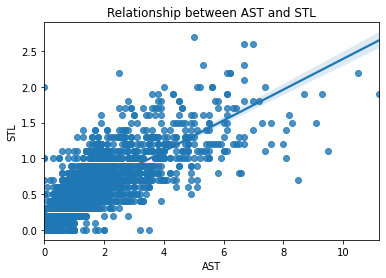

In [1053]:
sns.regplot(x =hof['AST'], y=hof['STL'])
plt.title('Relationship between AST and STL')

In [992]:
hof['STL'] = np.where((hof['AST'] <= 3)& (hof['STL']==None),hof[hof['AST']<=3].STL.mean(),None)
#hof_test = hof[hof['AST']<=3].STL.fillna(hof[hof['AST']<=3].STL.mean())
#hof = hof[hof['AST']>3 & hof['AST']<=5].STL.fillna(hof[hof['AST']>3 & hof['AST']<=5].STL.mean())
#hof = hof[hof['AST']>5].STL.fillna(hof[hof['AST']>9].STL.mean())


0       0.3
1       1.2
2       3.6
3       3.5
4       1.1
       ... 
3458    0.3
3459    0.2
3460    3.5
3461    0.1
3462    1.4
Name: AST, Length: 3173, dtype: float64

In [933]:
sns.regplot(x =hof['REB'], y=hof['BLK'])
plt.title('Relationship between REB and BLK')

KeyError: 'REB'

In [898]:
hof = hof[hof['REB']<=5].BLK.fillna(hof[hof['REB']<=5].BLK.mean())
hof = hof[hof['REB']>5 & hof['REB']<=9].BLK.fillna(hof[hof['REB']>5 & hof['REB']<=9].BLK.mean())
hof = hof[hof['REB']>9].BLK.fillna(hof[hof['REB']>9].BLK.mean())

KeyError: 'REB'

Text(0.5, 1.0, 'Relationship between AST and TO')

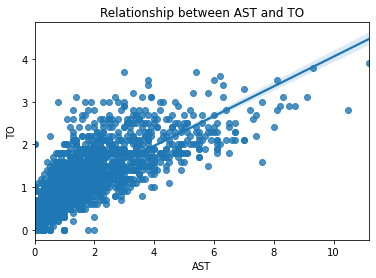

In [877]:
sns.regplot(x =hof['AST'], y=hof['TO'])
plt.title('Relationship between AST and TO')

In [ ]:
hof = hof[hof['AST']<=3].TO.fillna(hof[hof['AST']<=3].TO.mean())
hof = hof[hof['AST']>3 & hof['AST']<=5].TO.fillna(hof[hof['AST']>3 & hof['AST']<=5].TO.mean())
hof = hof[hof['AST']>5].TO.fillna(hof[hof['AST']>9].TO.mean())

In [1054]:
avg_to=hof.TO.mean()
avg_stl=hof.STL.mean()
avg_blk=hof.BLK.mean()

In [1055]:
hof['TO'] = hof['TO'].fillna(avg_to)

In [1056]:
hof['STL'] = hof['STL'].fillna(avg_stl)


In [1057]:
hof['BLK']=hof['BLK'].fillna(avg_blk)


In [810]:
hof = hof[hof.REB<=5].BLK.fillna(hof[hof.REB<=5].BLK.mean())
hof = hof[hof.REB>5 & hof.REB<=9].BLK.fillna(hof[hof.REB>5 & hof.REB<=9].BLK.mean())
hof = hof[hof.REB>9].BLK.fillna(hof[hof.REB>9].BLK.mean())

hof = hof[hof.BLK<=1].REB.fillna(hof[hof.BLK<=1].REB.mean())
hof = hof[hof.BLK>1 & hof.BLK<=2].REB.fillna(hof[hof.BLK<=1 & hof.BLK<=2].REB.mean())
hof = hof[hof.BLK>2].REB.fillna(hof[hof.BLK>2].REB.mean())

AttributeError: 'Series' object has no attribute 'REB'

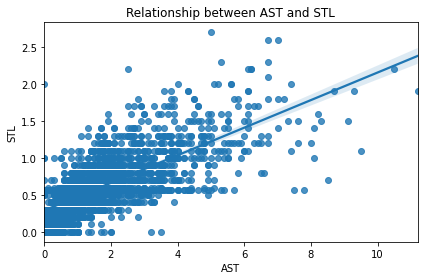

In [1058]:
sns.regplot(x =hof['AST'], y=hof['STL'])
plt.title('Relationship between AST and STL')
plt.tight_layout()



Text(0.5, 1.0, 'Relationship between REB and BLK')

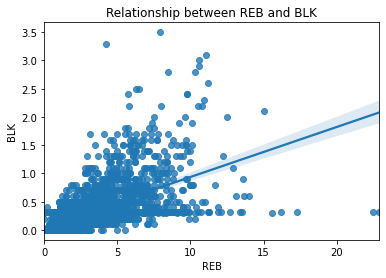

In [1059]:
sns.regplot(x =hof['REB'], y=hof['BLK'])
plt.title('Relationship between REB and BLK')

## <U> Part 3: Familiarity with the dataset
    
Our hypothesis is that players in hall of fame players have better data than players who are not in the Hall of Fame 
    

In [1060]:
hof.sample(5)

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
2127,Rodney Monroe,38,0,8.2,36.8,22.2,82.6,0.9,0.7,0.3,...,0,0,0,0,0,1,0,0,0,0.0
901,Mike Evans,591,15,16.7,45.2,30.7,80.7,1.4,2.6,0.7,...,0,0,0,0,0,9,8,0,0,0.0
602,Michael Cooper,873,94,27.1,46.9,34.0,83.3,3.2,4.2,1.2,...,0,0,0,5,3,12,11,8,5,0.0
1037,Chris Garner,46,0,9.6,28.0,19.0,61.5,0.8,1.4,0.6,...,0,0,0,0,0,2,0,0,0,0.0
412,Chase Budinger,407,50,19.7,43.0,35.2,79.7,3.0,1.2,0.5,...,0,0,0,0,0,7,0,0,0,0.0


In [1061]:
hof.describe(include='all')

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
count,3173,3173.000000,3173.000000,3121.000000,3173.000000,2181.000000,3173.000000,3173.000000,3173.000000,3173.000000,...,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000
unique,3154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Charles Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,319.191617,105.360857,16.531080,41.334132,19.315314,67.486448,3.030318,1.482414,0.566143,...,0.096439,0.095808,0.031831,0.065868,0.069965,5.634415,2.700284,0.469587,0.234794,0.043492
std,NaN,330.006153,216.067601,8.978757,10.164589,16.789416,18.436222,2.320253,1.387330,0.359137,...,0.761314,0.527573,0.250966,0.569073,0.437978,4.642514,3.391164,1.121035,0.782468,0.203994
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,41.000000,0.000000,9.000000,37.600000,0.000000,62.600000,1.400000,0.500000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,179.000000,0.000000,15.500000,42.800000,21.000000,71.400000,2.400000,1.000000,0.566143,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,NaN,551.000000,88.000000,23.100000,46.700000,33.000000,77.900000,4.000000,2.000000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,0.000000,0.000000,0.000000


##### Let's look on some differnce between Hall of fame members and not

Text(0.5, 1.0, 'Data separate by Hall of fame memebership or not')

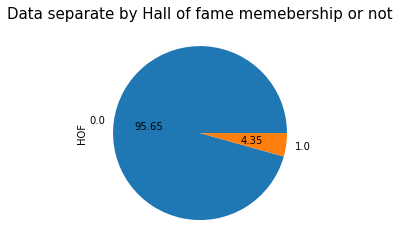

In [1062]:
hof["HOF"].value_counts().plot(kind = "pie", autopct = "%.2f" )
plt.title('Data separate by Hall of fame memebership or not',fontsize=15)

In [1063]:
hof_players= hof[hof['HOF'] == 1]
Not_hof_hof_players=hof[hof['HOF'] == 0]

Text(0.5, 1.0, 'Relationship MIN and PTS')

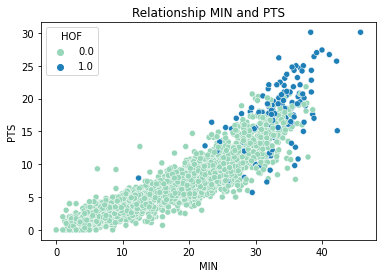

In [1064]:
fig, ax = plt.subplots()
sns.scatterplot(x = hof.MIN, y = hof.PTS, hue = hof['HOF'], palette = 'YlGnBu')
ax.yaxis.label.set_color("black")
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');
plt.title('Relationship MIN and PTS')

[Text(0.5, 0, 'Hall of fame'), Text(0, 0.5, 'All star games average')]

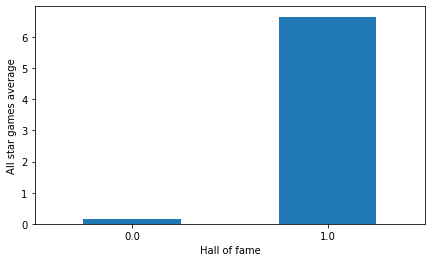

In [1065]:
labels = ["Hall of fame", "Not hall of fame"]
ax2 = hof.groupby('HOF').mean()['ASG']
ax2 = ax2.plot.bar(figsize=(7,4), rot=0)
ax2.set(xlabel='Hall of fame', ylabel='All star games average')


<AxesSubplot:xlabel='Finals', ylabel='Titles'>

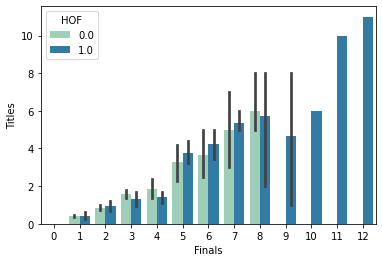

In [1066]:
sns.barplot(x = hof.Finals, y = hof.Titles, hue = hof.HOF, palette = 'YlGnBu')

##### As we can see our hypothesis is correct


## <U> Part 4: Correlations and make new features

##### Correlations HOF with avarage colmuns

In [1067]:
hof = hof.set_index('PLAYER_NAME')

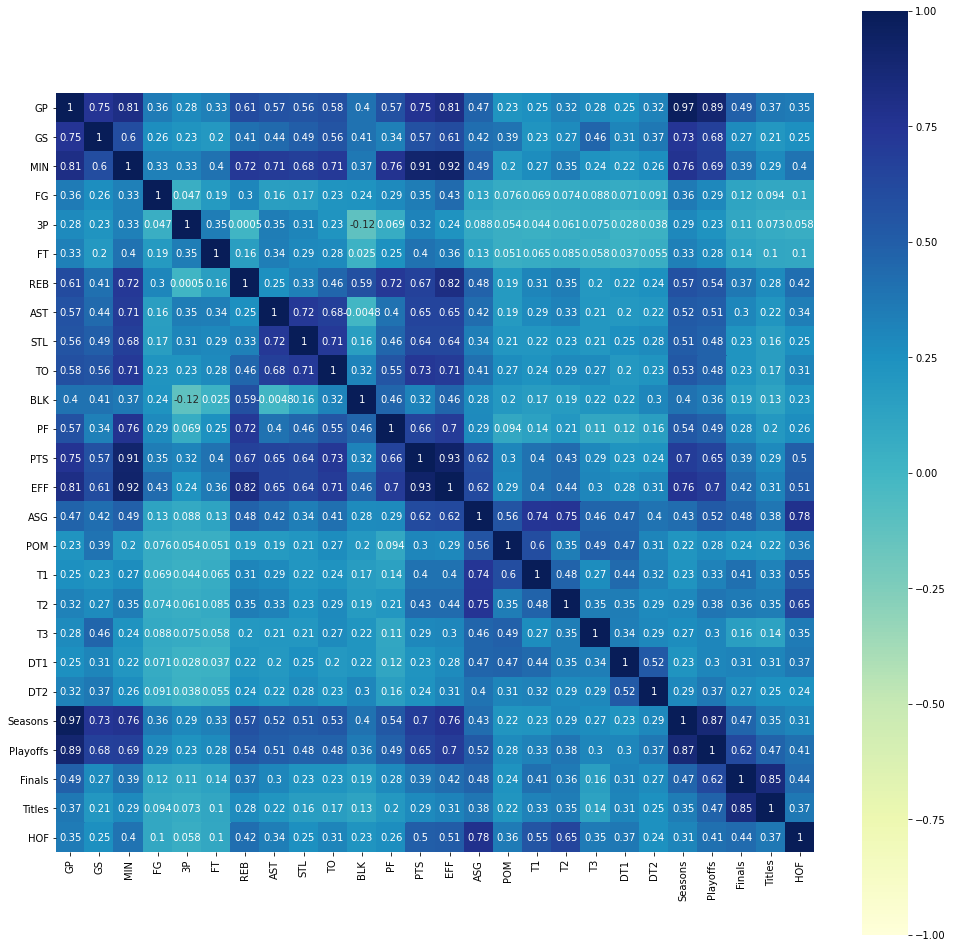

In [1068]:
correlation_features = hof.columns  


nba_corr = hof[correlation_features].corr()
plt.subplots(figsize=(17,17))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":10},
    xticklabels = nba_corr.columns.values, 
    yticklabels = nba_corr.columns.values, 
    vmin = -1, 
    vmax = 1, 
    center = 0, 
    cmap = "YlGnBu", 
    square = True) 
plt.show();

### <U>Conclusions 

* High correlations between MIN & PTS & EFF
* Low correlations between 3P & HOF
* High correlations between Playoffs & Seasons
* High correlations between Finals & Titles
* High correlations between ASG & HOF
   

### <U> Decisions
    
* Remove MIN
* Remove 3P    
* Remove PTS
* Remove Seasons
* Remove Titles
* Make new features that will include T1,T2,T3 together
* Make new features that will include DT1,DT2 together 

In [1069]:
hof.drop(['MIN','3P','PTS','Seasons','Titles'], axis=1, inplace=True)

##### Make the new features
 

In [1070]:
hof["T_sum"] = hof["T1"] * 1.4 + hof["T2"] * 1.2 + hof["T3"]
hof["DT_sum"] = hof["DT1"] * 1.2 + hof["DT2"] 
hof

,GP,GS,FG,FT,REB,AST,STL,TO,BLK,PF,...,T1,T2,T3,DT1,DT2,Playoffs,Finals,HOF,T_sum,DT_sum
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Alaa Abdelnaby,256,53,50.2,70.1,3.3,0.3,0.300000,1.000000,0.300000,1.9,...,0,0,0,0,0,3,1,0.0,0.0,0.0
Zaid Abdul-Aziz,505,0,42.8,72.8,8.0,1.2,0.600000,0.900000,1.000000,2.2,...,0,0,0,0,0,3,0,0.0,0.0,0.0
Kareem Abdul-Jabbar,1560,625,55.9,72.1,11.2,3.6,0.900000,2.700000,2.600000,3.0,...,10,5,0,5,6,18,10,1.0,20.0,12.0
Mahmoud Abdul-Rauf,586,336,44.2,90.5,1.9,3.5,0.800000,1.600000,0.100000,1.9,...,0,0,0,0,0,2,0,0.0,0.0,0.0
Tariq Abdul-Wahad,236,145,41.7,70.3,3.3,1.1,0.800000,1.300000,0.400000,2.1,...,0,0,0,0,0,2,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wang Zhizhi,137,1,41.7,73.5,1.7,0.3,0.200000,0.500000,0.300000,1.1,...,0,0,0,0,0,3,0,0.0,0.0,0.0
Jiri Zidek,135,23,40.8,78.3,2.1,0.2,0.100000,0.500000,0.100000,1.8,...,0,0,0,0,0,0,0,0.0,0.0,0.0
Derrick Zimmerman,2,0,66.7,0.0,2.0,3.5,0.000000,2.000000,0.000000,2.0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


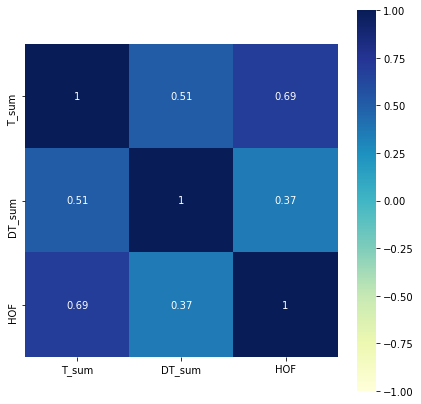

In [1071]:
correlation_features = [ 'T_sum','DT_sum','HOF']


nba_corr = hof[correlation_features].corr()
plt.subplots(figsize=(7,7))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, annot=True, annot_kws={"fontsize":10},xticklabels = nba_corr.columns.values, 
                   yticklabels = nba_corr.columns.values, vmin = -1,vmax = 1, center = 0,cmap="YlGnBu",square = True) 
plt.show();

##### We can see that T_sum and DT_sum are correlate better than T1,T2,T3,DT1,DT2 

##### After we made new features that corrlation better with HOF we will remove the features that we used 

In [1072]:
hof.drop(['T1','T2','T3','DT1','DT2'], axis=1, inplace=True)

In [1079]:
hof.HOF.sum()

138.0

## <U> Part 5: Train test split & Scaling & Balance the data 

##### Train test split

In [1076]:
X = hof[['GP','GS','AST', 'REB','FT', 'PF','EFF', 'ASG', 'POM','T_sum','DT_sum', 'Playoffs','Finals']]       
y = hof['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [1078]:
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X_train, y_train)


,GP,GS,AST,REB,FT,PF,EFF,ASG,POM,T_sum,DT_sum,Playoffs,Finals
0,300,178,0.600000,5.200000,51.400000,3.500000,9.800000,0,0,0.000000,0.000000,3,0
1,680,233,1.800000,5.700000,75.700000,2.800000,12.400000,0,0,0.000000,0.000000,5,0
2,487,0,1.800000,5.600000,73.900000,3.300000,11.000000,0,0,0.000000,0.000000,3,0
3,642,0,1.500000,3.800000,80.500000,3.000000,11.700000,0,0,0.000000,0.000000,0,0
4,418,319,1.200000,7.700000,69.000000,2.500000,16.000000,1,0,1.200000,0.000000,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,843,261,6.387052,3.457655,80.731259,2.403362,19.758155,4,0,5.235621,0.000000,5,0
4556,1341,1278,3.915473,5.379280,79.600268,2.661049,18.661049,9,3,5.056913,1.402221,14,2
4557,983,0,2.938391,13.271662,77.546813,3.117185,22.746434,9,0,9.297268,2.181715,11,2
4558,1209,1053,7.892124,3.626297,86.715902,1.821046,18.357887,7,2,8.600000,2.136777,12,1


##### Scaling
Scale the data with MinMaxScaler method

In [1096]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_resample)
X_train_copy = pd.DataFrame(scaler.transform(x_resample),  columns = x_resample.columns)
X_test_copy = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_train=y_resample

##### Balance the data
Because our data is not balance( 4% HOF, 96% not HOF) we will use resample method to balance.
The method create new rows of HOF and compare it to the not HOF 

In [1097]:
from sklearn.dummy import DummyClassifier

DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test_copy)
dummy_clf.score(X_test_copy, y_test)


0.9508816120906801

In [1098]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_copy,y_train)
prediction=model.predict(X_train_copy)
print("Accuracy:",metrics.accuracy_score(prediction,y_train))
print("Re-call:",metrics.recall_score(prediction, y_train))
print("Precision:",metrics.precision_score(prediction, y_train))
print("f1:",metrics.f1_score(prediction,y_train))
print("fbeta:",metrics.fbeta_score(prediction, y_train, beta=3))

Accuracy: 0.9833333333333333
Re-call: 0.9681393372982158
Precision: 0.999561403508772
f1: 0.9835994820889081
fbeta: 0.9711923634194154


Text(0, 0.5, 'Testing Accuracy')

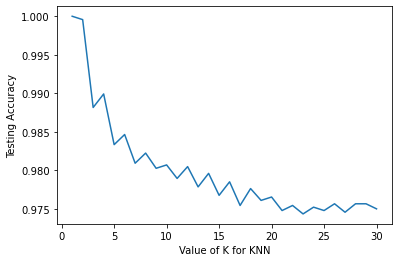

In [1103]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_copy,y_train)
    prediction = knn.predict(X_train_copy)
    scores.append(metrics.accuracy_score(y_train, prediction))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [1101]:
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = k)
    ValScore = cross_val_score(knn, X_train_copy, y_train, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.9855263157894736
Cross-validation score for k = 2 is: 0.987280701754386
Cross-validation score for k = 3 is: 0.9800438596491228
Cross-validation score for k = 4 is: 0.9833333333333332
Cross-validation score for k = 5 is: 0.9785087719298244
Cross-validation score for k = 6 is: 0.9804824561403509
Cross-validation score for k = 7 is: 0.9778508771929824
Cross-validation score for k = 8 is: 0.9802631578947368
Cross-validation score for k = 9 is: 0.976315789473684
Cross-validation score for k = 10 is: 0.9778508771929824
Cross-validation score for k = 11 is: 0.9749999999999999
Cross-validation score for k = 12 is: 0.9765350877192981
Cross-validation score for k = 13 is: 0.9741228070175438
Cross-validation score for k = 14 is: 0.975657894736842
Cross-validation score for k = 15 is: 0.9739035087719298
Cross-validation score for k = 16 is: 0.975657894736842
Cross-validation score for k = 17 is: 0.9732456140350875
Cross-validation score for k = 18 is: 0.9749

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train.values.ravel())

In [ ]:
cross_val_score(logmodel,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

In [ ]:
predictions = logmodel.predict(X_val)

In [853]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_preds, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
cmd.plot()


NameError: name 'y_true' is not defined